### 以下を実施してください。

1. 次頁のECサイトの問題を考え、課題を提案してください。
2. 課題を解決するためプロジェクト計画書を作成してください。 
3. WBSを作成、結果をスケジュール表に落とし込んでください。 
4. スケジュール表に従って分析を実行してください。
5. 分析の実行結果をプレゼン(以下の構成)にまとめてください。


* A) 表紙
* B) 結論
* C) 詳細(内容は2枚まで+品質保証として行った内容を1枚)
* D) 結論

### ◆ 以下を提出してください。(ファイル名はお任せします) 

* プロジェクト計画書、スケジュール表
* プロジェクトマネジメント用ドキュメント.xlsxからスタートして作成してください。 
* 分析結果のプレゼン資料
PPTX や PDF などで提出してください。

# 課題
ECサイトを運営しているが、今のところ、自分の感覚で販売するものを決めている。お客様の興味を把握せずに販売しているので、もしかしたらもっと売れるはずのところを逃しているかもしれない。

---
##### 顧客データ(User.csv)

* UserID:顧客番号
* Gender:性別
* Age:年齢
* 趣味(アンケートにより取得)
    * Sports:スポーツ
    * Outdoors:アウトドア 
    * Reading:読書
    * Music:音楽
    * Movie:映画
    * Fashion:ファッション 
    * Crafts:日曜大工
    * Cooking:料理
    
##### 購入データ(Tran.csv)

* UserID:顧客番号
* Month:購入月
* Amount:当該月の購入額


※ 趣味はジャンルを変数として保持しており、各ジャンルへの興味を1~5の 値として保持している。(1は興味なし、5は強く興味がある)

---

In [124]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## データインポート

In [125]:
user = pd.read_csv('./data/user.csv')
user

,UserID,Gender,Age,Sports,Outdoors,Reading,Music,Movie,Fashion,Crafts,Cooking
0,U000001,M,44,3,5,2,1,1,1,5,3
1,U000002,F,36,3,5,1,1,1,1,5,3
2,U000003,F,29,4,5,1,3,1,2,2,1
3,U000004,M,37,2,1,3,3,3,1,1,5
4,U000005,F,37,3,5,1,1,2,2,5,2
...,...,...,...,...,...,...,...,...,...,...,...
3523,U003524,F,30,1,1,3,3,3,5,1,1
3524,U003525,F,36,2,5,2,1,1,1,5,3
3525,U003526,F,47,2,1,3,3,3,1,1,5
3526,U003527,M,23,1,1,3,3,3,5,1,1


In [126]:
tran = pd.read_csv('./data/tran.csv')
tran

,UserID,Month,Amount
0,U000001,Nov,21000
1,U000003,Apr,37000
2,U000003,Oct,2000
3,U000003,Dec,2000
4,U000004,Feb,2000
...,...,...,...
6536,U003526,Jun,2000
6537,U003527,Feb,1000
6538,U003527,Jun,89000
6539,U003527,Jul,105000


## データの確認

In [127]:
# 欠損値
user.isna().sum()

UserID      0
Gender      0
Age         0
Sports      0
Outdoors    0
Reading     0
Music       0
Movie       0
Fashion     0
Crafts      0
Cooking     0
dtype: int64

In [128]:
## 男女のデータを２値化
user["Gender"] = user["Gender"].apply(lambda gen: 0 if gen=="F" else 1)

In [129]:
# 欠損値
tran.isna().sum()

UserID    0
Month     0
Amount    0
dtype: int64

## 販売データの確認

In [130]:
tran.describe()

,Amount
count,6541.000000
mean,22313.866381
std,32070.551604
min,1000.000000
25%,2000.000000
50%,9000.000000
75%,23000.000000
max,134000.000000


In [254]:
tran.groupby('UserID').sum()

,Amount
UserID,
U000001,21000
U000003,41000
U000004,3000
U000005,27000
U000006,103000
...,...
U003524,209000
U003525,66000
U003526,2000


In [131]:
tran_group = tran.groupby('UserID').sum()
df = pd.merge(user, tran_group, on="UserID", how="outer")
df.fillna(0, inplace=True)
df

,UserID,Gender,Age,Sports,Outdoors,Reading,Music,Movie,Fashion,Crafts,Cooking,Amount
0,U000001,1,44,3,5,2,1,1,1,5,3,21000.0
1,U000002,0,36,3,5,1,1,1,1,5,3,0.0
2,U000003,0,29,4,5,1,3,1,2,2,1,41000.0
3,U000004,1,37,2,1,3,3,3,1,1,5,3000.0
4,U000005,0,37,3,5,1,1,2,2,5,2,27000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3523,U003524,0,30,1,1,3,3,3,5,1,1,209000.0
3524,U003525,0,36,2,5,2,1,1,1,5,3,66000.0
3525,U003526,0,47,2,1,3,3,3,1,1,5,2000.0
3526,U003527,1,23,1,1,3,3,3,5,1,1,195000.0


In [132]:
df["Amount"].describe()

count      3528.000000
mean      41370.464853
std       53615.921919
min           0.000000
25%        3000.000000
50%       22000.000000
75%       48000.000000
max      525000.000000
Name: Amount, dtype: float64

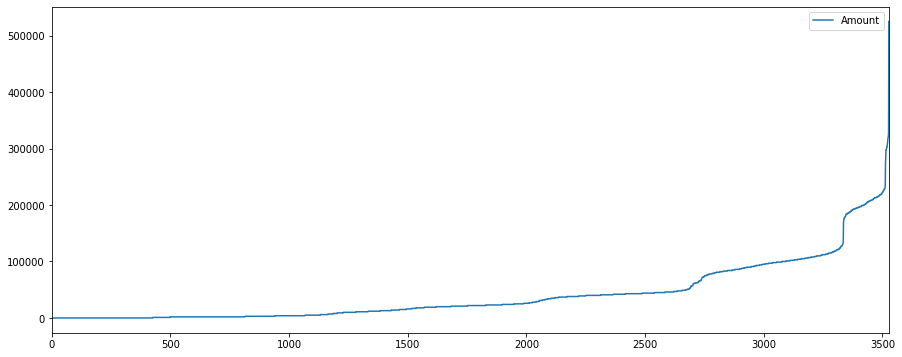

In [133]:
tran_sort = df.sort_values(by="Amount")
tran_sort.reset_index(inplace=True)
tran_sort.plot(x=None, y="Amount", figsize=(15, 6));

## 興味データの分析

In [134]:
user.describe()

,Gender,Age,Sports,Outdoors,Reading,Music,Movie,Fashion,Crafts,Cooking
count,3528.000000,3528.000000,3528.000000,3528.000000,3528.000000,3528.000000,3528.000000,3528.000000,3528.000000,3528.000000
mean,0.398526,35.057256,2.521825,2.996599,2.100624,2.546769,2.096372,2.111961,2.128968,2.551587
std,0.489664,7.240187,1.517717,1.843152,0.962477,0.865540,0.971559,1.613732,1.631863,1.527242
min,0.000000,11.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,30.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000
50%,0.000000,35.000000,2.000000,2.000000,2.000000,3.000000,2.000000,1.000000,1.000000,2.000000
75%,1.000000,40.000000,4.000000,5.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000
max,1.000000,56.000000,5.000000,5.000000,4.000000,4.000000,4.000000,5.000000,5.000000,5.000000


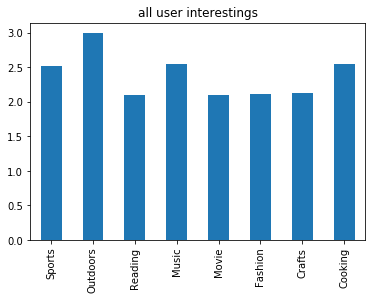

In [135]:
interest_mean = user.describe().iloc[1, 2:10]
interest_mean.plot(kind="bar", title="all user interestings");

## 点数をつけた分析

In [232]:
tran_group = tran.groupby("UserID").sum()
point_df = pd.merge(user, tran_group, on="UserID", how="outer")
point_df.fillna(0, inplace=True)

## point 付与
point_df["SUM_interest"] = point_df.iloc[:, 3:11].sum(axis=1)
for i in range(len(point_df)):
    point_df.iloc[i, 3:11] = point_df.iloc[i, 3:11].div(point_df.iloc[i, -1]).mul(point_df.iloc[i, -2])
    
point_df

,UserID,Gender,Age,Sports,Outdoors,Reading,Music,Movie,Fashion,Crafts,Cooking,Amount,SUM_interest
0,U000001,1,44,3000.000000,5000.000000,2000.000000,1000.000000,1000.000000,1000.000000,5000.000000,3000.000000,21000.0,21
1,U000002,0,36,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,20
2,U000003,0,29,8631.578947,10789.473684,2157.894737,6473.684211,2157.894737,4315.789474,4315.789474,2157.894737,41000.0,19
3,U000004,1,37,315.789474,157.894737,473.684211,473.684211,473.684211,157.894737,157.894737,789.473684,3000.0,19
4,U000005,0,37,3857.142857,6428.571429,1285.714286,1285.714286,2571.428571,2571.428571,6428.571429,2571.428571,27000.0,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3523,U003524,0,30,11611.111111,11611.111111,34833.333333,34833.333333,34833.333333,58055.555556,11611.111111,11611.111111,209000.0,18
3524,U003525,0,36,6600.000000,16500.000000,6600.000000,3300.000000,3300.000000,3300.000000,16500.000000,9900.000000,66000.0,20
3525,U003526,0,47,210.526316,105.263158,315.789474,315.789474,315.789474,105.263158,105.263158,526.315789,2000.0,19
3526,U003527,1,23,10833.333333,10833.333333,32500.000000,32500.000000,32500.000000,54166.666667,10833.333333,10833.333333,195000.0,18


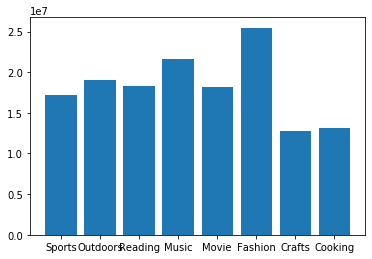

In [233]:
dfsum = point_df.sum()[3:11]
xlist = dfsum.index.tolist()
ylist = dfsum.values.tolist()
plt.bar(xlist, ylist);

# KMeans法によるクラスタリング
*   n_clusters：クラスターの数を指定します。
*   max_iter：（何度か計算をして再現性のチェックをしてアウトプットするのですが）計算の回数を指定します。
*   random_state：分割の閾値を決めるときに乱数をしようする場合があり、その際のシードの値を入力します。（値を定めておくと処理の再現性が得られます）

In [136]:
# KMeans用のライブラリをインポート
from sklearn.cluster import KMeans

In [137]:
# KMeansに使用するデータを準備
columnList = ['Sports', 'Outdoors', 'Reading', 'Music', 'Movie', 'Fashion', 'Crafts', 'Cooking']
X = user.loc[:, columnList]

In [138]:
# データの標準化を行うためのモジュールをインポート
from sklearn.preprocessing import StandardScaler

In [139]:
# 説明変数を標準化（平均0、標準偏差1となるように変数変換）する
# 標準偏差と正規化 http://ailaby.com/scaler/
sclr_X = StandardScaler()
sclr_X.fit(X)
X_std = sclr_X.transform(X)

In [140]:
# KMeans法を実施しクラスターを構築する
clf = KMeans(n_clusters=4, max_iter=10, random_state=1234)
clf.fit(X_std)

KMeans(max_iter=10, n_clusters=4, random_state=1234)

In [141]:
## クラスター番号を付与
X["Cluster"] = clf.predict(X_std)

In [234]:
# クラスターごとの件数を数える
X["Cluster"].value_counts()

1    914
2    895
0    872
3    847
Name: Cluster, dtype: int64

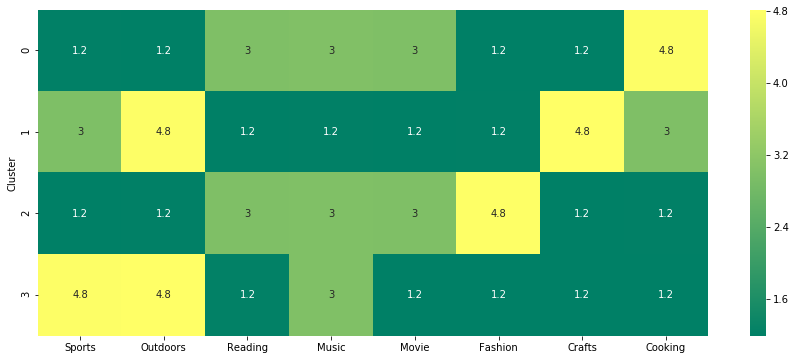

In [235]:
## クラスターごとの特徴を見る
plt.figure(figsize=(15, 6))
sns.heatmap(X.groupby("Cluster").mean(), annot=True, cmap="summer");

* クラス：ファッションに興味がある人
* クラス：スポーツ/アウトドアに興味意がある人
* クラス：料理に興味がある人
* クラス：アウトドア/クラフトに興味がある人

## クラスタリングをもとに分析

In [247]:
df = user.copy(deep=True)
df["Cluster"] = X["Cluster"]
df

,UserID,Gender,Age,Sports,Outdoors,Reading,Music,Movie,Fashion,Crafts,Cooking,Cluster
0,U000001,1,44,3,5,2,1,1,1,5,3,1
1,U000002,0,36,3,5,1,1,1,1,5,3,1
2,U000003,0,29,4,5,1,3,1,2,2,1,3
3,U000004,1,37,2,1,3,3,3,1,1,5,0
4,U000005,0,37,3,5,1,1,2,2,5,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3523,U003524,0,30,1,1,3,3,3,5,1,1,2
3524,U003525,0,36,2,5,2,1,1,1,5,3,1
3525,U003526,0,47,2,1,3,3,3,1,1,5,0
3526,U003527,1,23,1,1,3,3,3,5,1,1,2


In [248]:
## 購入金額の和をもとにマージ
transum = tran.groupby('UserID').sum()
transum

,Amount
UserID,
U000001,21000
U000003,41000
U000004,3000
U000005,27000
U000006,103000
...,...
U003524,209000
U003525,66000
U003526,2000


In [249]:
df = pd.merge(df, transum, on="UserID", how="outer")
df

,UserID,Gender,Age,Sports,Outdoors,Reading,Music,Movie,Fashion,Crafts,Cooking,Cluster,Amount
0,U000001,1,44,3,5,2,1,1,1,5,3,1,21000.0
1,U000002,0,36,3,5,1,1,1,1,5,3,1,NaN
2,U000003,0,29,4,5,1,3,1,2,2,1,3,41000.0
3,U000004,1,37,2,1,3,3,3,1,1,5,0,3000.0
4,U000005,0,37,3,5,1,1,2,2,5,2,1,27000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3523,U003524,0,30,1,1,3,3,3,5,1,1,2,209000.0
3524,U003525,0,36,2,5,2,1,1,1,5,3,1,66000.0
3525,U003526,0,47,2,1,3,3,3,1,1,5,0,2000.0
3526,U003527,1,23,1,1,3,3,3,5,1,1,2,195000.0


In [250]:
df.fillna(0, inplace=True)
df

,UserID,Gender,Age,Sports,Outdoors,Reading,Music,Movie,Fashion,Crafts,Cooking,Cluster,Amount
0,U000001,1,44,3,5,2,1,1,1,5,3,1,21000.0
1,U000002,0,36,3,5,1,1,1,1,5,3,1,0.0
2,U000003,0,29,4,5,1,3,1,2,2,1,3,41000.0
3,U000004,1,37,2,1,3,3,3,1,1,5,0,3000.0
4,U000005,0,37,3,5,1,1,2,2,5,2,1,27000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3523,U003524,0,30,1,1,3,3,3,5,1,1,2,209000.0
3524,U003525,0,36,2,5,2,1,1,1,5,3,1,66000.0
3525,U003526,0,47,2,1,3,3,3,1,1,5,0,2000.0
3526,U003527,1,23,1,1,3,3,3,5,1,1,2,195000.0


In [251]:
## 購入金額の調査
global num
num = len(df)

def tran_check(df):
    global num
    amount_mean = df["Amount"].mean()
    ## 課金ユーザの定義
    buy = df[df["Amount"] != 0]["Amount"].count()
    buy = buy / num

    print(f'全体の人数：{len(df)}人')
    print(f'購入金額平均値：{amount_mean:.2f}')
    print(f'購入ユーザの割合：{buy:.2%}')

In [252]:
## メモ
clustermemo = {
    2: "ファッションに興味がある人",
    3: "スポーツ/アウトドアに興味がある人",
    0: "料理に興味がある人",
    1: "アウトドア/クラフトに興味がある人",
}

In [253]:
print('-' *10)
print("ユーザ全体の調査")
tran_check(df)

for i in range(4):
    print('-' *10)
    print(f"クラスター{i}の調査")
    print("> ", clustermemo[i])
    tran_check(df[df["Cluster"] == i])

----------
ユーザ全体の調査
全体の人数：3528人
購入金額平均値：41370.46
購入ユーザの割合：87.95%
----------
クラスター0の調査
>  料理に興味がある人
全体の人数：872人
購入金額平均値：12020.64
購入ユーザの割合：21.77%
----------
クラスター1の調査
>  アウトドア/クラフトに興味がある人
全体の人数：914人
購入金額平均値：22309.63
購入ユーザの割合：22.53%
----------
クラスター2の調査
>  ファッションに興味がある人
全体の人数：895人
購入金額平均値：92925.14
購入ユーザの割合：22.56%
----------
クラスター3の調査
>  スポーツ/アウトドアに興味がある人
全体の人数：847人
購入金額平均値：37678.87
購入ユーザの割合：21.09%
